In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [18]:
def mdr_TASEP(L=10, a=0.3, b=0.3, P=0.3, PR=0.1, bR=0.8, timesteps=100, multi=10):
    """
    A basic TASEP(Totally Asimmetric Simple Exclusion Process) that creates a lattice(l) of lenght(L) 
    over time(timesteps) in an 2D array l. This function reads l at time t and edit time t+1.
    A ribosome or a 1 enter to l with (a) probability if the first space is empty, if there are a 1 in the first position
    is copied to t+1. The 1s moves over l with (P) probability only if there 0 in the next position so they can not move
    if there another 1 in front of them. Finally the 1s get out from l with (b) probability.
    The code is ejecuted (multi times where the final l is summed to (stored_l) and then this array is divided by m 
    to get the average ocupancy over all the positions.
    Show some relevant data.
    """
    stored_l=np.zeros((timesteps,L))
    stored_riboexit = np.array([0])
    stored_protein=np.zeros((timesteps))
    for m in range(multi):
        #lattice
        l = np.zeros((timesteps,L))
        l[0,0]=2
        protein=np.zeros((timesteps))
        #l[0]=np.ones((L))
        riboexit=np.array([0])
        for t in range(timesteps-1):
            #RNAP 
            for r in range(L-1):
                if l[t,r] == 2 and l[t,r+1] == 0:
                    if np.random.uniform(0,1) <= PR:
                            l[t+1,r] = 0
                            l[t+1,r+1] = 2
                    else:
                        l[t+1,r] = 2   
            if l[t,-1] == 2:
                if np.random.uniform(0,1) <= bR:
                    l[t+1,-1] = 0
                else:
                    l[t+1,-1] = 2 
                    
            #Ribosome
            if l[t,0] == 0:
                if np.random.uniform(0,1) <= a:
                    l[t+1,0] = 1           
                else:
                    l[t+1,0] = 1        
            for w in range(L-1): 
                if l[t,w] == 1 and l[t,w+1] == 0:    
                    if np.random.uniform(0,1) <= P:
                            l[t+1,w] = 0
                            l[t+1,w+1] = 1
                    else:
                        l[t+1,w] = 1
                elif l[t,w] == 1 and l[t,w+1] != 0:
                     l[t+1,w] = 1    
            if l[t,-1] == 1:
                if np.random.uniform(0,1) <= b:
                    l[t+1,-1] = 0
                    riboexit+=1
                    protein[t] = 1
                else:
                    l[t+1,-1] = 1                
  
            #End TASEP loop
        stored_l = stored_l + l
        stored_riboexit = stored_riboexit + riboexit
        stored_protein =stored_protein + protein
        #proteins=np.concatenate((proteins, stored_riboexit))
        #stored_l/m is the new work array
    #End multi loop

    #Showing Data
    plt.imshow(stored_l/m)
    plt.axes().set_aspect('auto')
    plt.xlabel('Position')
    plt.ylabel('TimeStep')
    plt.suptitle('Where are my ribosomes')
    #color bar
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.show()
    

    #Tell me what's going on fast
    
    plt.subplot(224)
    plt.plot(np.arange(len(np.cumsum (stored_protein/m,0))), np.cumsum (stored_protein/m,0), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('Protein Synthesis')

    plt.subplot(223)
    plt.plot(np.arange(len(np.mean (stored_l/m,0))), np.mean (stored_l/m,0), 'ro')
    plt.axis()
    plt.xlabel('Position')
    plt.ylabel('Ribosome Mean')

    plt.subplot(221)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), np.mean (stored_l/m,1), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('AvRibosomes/l')
    plt.suptitle('Whats going on')

    plt.subplot(222)
    plt.plot(np.arange(len(np.mean (stored_l/m,1))), P*(np.mean (l,1))*(1-np.mean (stored_l/m,1)), 'r-')
    plt.axis()
    plt.xlabel('Time')
    plt.ylabel('J')
    plt.show()

    print("Average J =", P*np.mean (stored_l/m,(0,1))*(1-np.mean (stored_l/m,(0,1))))
    print("Average Riboexit =",stored_riboexit/m )

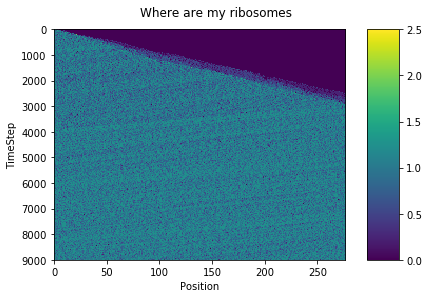

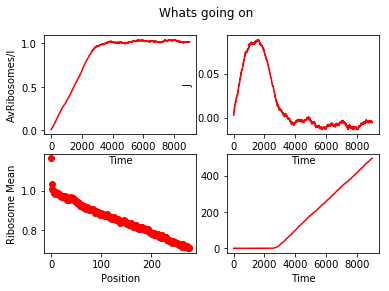

Average J = 0.0510284956554
Average Riboexit = [ 494.75]


In [19]:
#mdr_TASEP(L,a,b,P, PR,bR,timesteps,multi)
mdr_TASEP(277,0.32,0.08,0.4,0.1,0.08,9000,5)